# Settings & Initialisation

In [1]:
import os
import sys
sys.path.append("../../..") 
ROOT_DIR = '/home/jovyan/tta'

from comtrade.analysis import Analysis
tta = Analysis()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)

## Reporter Area

In [3]:
from comtrade.code.reporter_area import ReporterArea
reporter_area = ReporterArea()
reporter_area_ids = reporter_area.get_ids("India")
reporter_area_ids

[{'id': '699', 'text': 'India'}, {'id': '356', 'text': 'India, excl. Sikkim'}]

## Partner Area

In [4]:
from comtrade.code.partner_area import PartnerArea
partner_area = PartnerArea()
partner_area_ids = partner_area.get_ids("Korea")
partner_area_ids

[{'id': '408', 'text': "Dem. People's Rep. of Korea"},
 {'id': '410', 'text': 'Rep. of Korea'}]

## Trade Regime

In [5]:
from comtrade.code.trade_regime import TradeRegime
trade_regime = TradeRegime()
trade_regime_ids = trade_regime.get_ids("Export")
trade_regime_ids

[{'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}]

## Data availability request

In [6]:
source = 699 # India
destination = 410 # South Korea
tta.set_source_destination(source, destination)

source_status = tta.api.data_available(source, 201901, 'HS', 'M')
print(source_status)
destination_status = tta.api.data_available(destination, 201901, 'HS', 'M')
print(destination_status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201901', 'TotalRecords': 243076, 'isOriginal': 1, 'publicationDate': '2019-09-06T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '410', 'rDesc': 'Rep. of Korea', 'ps': '201901', 'TotalRecords': 197368, 'isOriginal': 1, 'publicationDate': '2020-04-23T00:00:00', 'isPartnerDetail': 1}]


## Import Data

In [7]:
in_imp = tta.api.get_month_data(source, destination, 1, 2019) 
jp_exp = tta.api.get_month_data(destination, source, 2, 2019) 

{'r': 699, 'p': 410, 'rg': 1, 'ps': '201901', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 1, 'ps': '201902', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 1, 'ps': '201903', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 1, 'ps': '201904', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 1, 'ps': '201905', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 1, 'ps': '201906', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 1, 'ps': '201907', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 1, 'ps': '201908', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 1, 'ps': '201909', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 1, 'ps': '201910', 'px': 'HS', 'cc': 'TOTAL', 

In [8]:
df = pd.DataFrame.from_dict([in_imp, jp_exp])
df.index = ['india', 'south korea']
df = df.T
df['month'] = df.index
df

,india,south korea,month
201901,1400304738,1426878440,201901
201902,1281070310,1211542091,201902
201903,1431970423,1374742288,201903
201904,1496723310,1322355640,201904
201905,1419284306,1414633494,201905
201906,1457433112,1271462559,201906
201907,1364901697,1367289664,201907
201908,1392529528,1284406484,201908
201909,1246352643,1149114330,201909
201910,1282959440,1155432477,201910


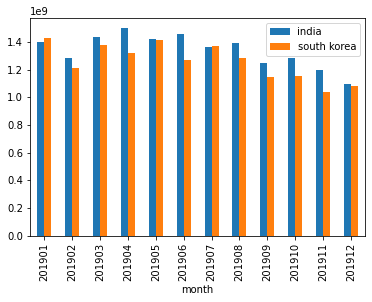

In [9]:
df.plot(kind='bar', y=['india','south korea'], x='month')
plt.show()

# Export Data

In [10]:
in_exp = tta.api.get_month_data(source, destination, 2, 2019) 
jp_imp = tta.api.get_month_data(destination, source, 1, 2019) 

{'r': 699, 'p': 410, 'rg': 2, 'ps': '201901', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 2, 'ps': '201902', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 2, 'ps': '201903', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 2, 'ps': '201904', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 2, 'ps': '201905', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 2, 'ps': '201906', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 2, 'ps': '201907', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 2, 'ps': '201908', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 2, 'ps': '201909', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 410, 'rg': 2, 'ps': '201910', 'px': 'HS', 'cc': 'TOTAL', 

In [11]:
df = pd.DataFrame.from_dict([in_imp, jp_exp])
df.index = ['india', 'south korea']
df = df.T
df['month'] = df.index
df

,india,south korea,month
201901,1400304738,1426878440,201901
201902,1281070310,1211542091,201902
201903,1431970423,1374742288,201903
201904,1496723310,1322355640,201904
201905,1419284306,1414633494,201905
201906,1457433112,1271462559,201906
201907,1364901697,1367289664,201907
201908,1392529528,1284406484,201908
201909,1246352643,1149114330,201909
201910,1282959440,1155432477,201910


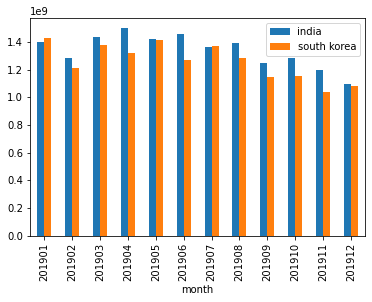

In [12]:
df.plot(kind='bar', y=['india','south korea'], x='month')
plt.show()